<a href="https://colab.research.google.com/github/lukman-17/Credit-Card-Analysis/blob/main/CreditcardFraud_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/CreditCardData.csv')
df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [ ]:
df.shape

(100000, 16)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Day of Week,0
Time,0
Type of Card,0
Entry Mode,0
Amount,6
Type of Transaction,0
Merchant Group,10
Country of Transaction,0


*Replace Pound Symbol from Amount Attribute*


In [ ]:

df['Amount'] = df['Amount'].replace('[£,]', '', regex=True)

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

df['Amount'].head()


,Amount
0,5.0
1,288.0
2,5.0
3,28.0
4,91.0


In [ ]:
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


***Visual Reprentation of Key Attributes***

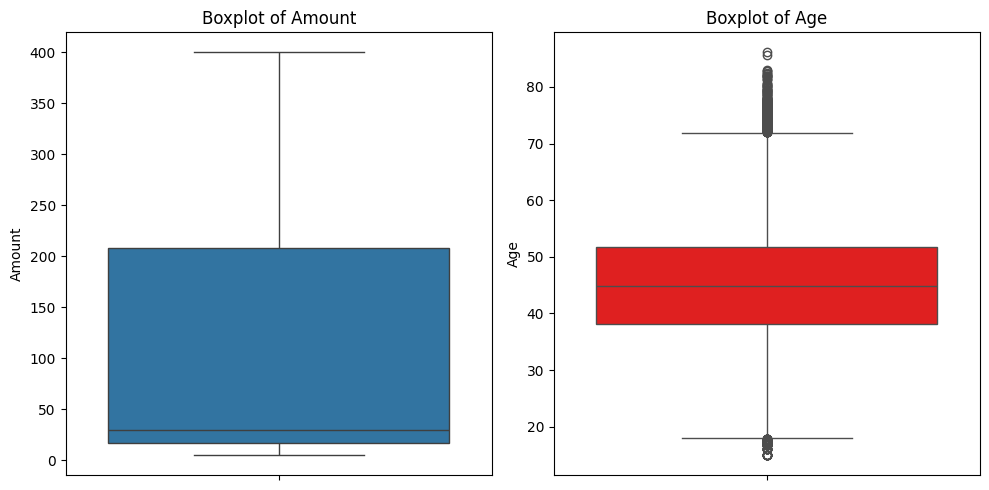

In [ ]:
plt.figure(figsize=(10, 5))

# Boxplot for 'Amount'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Amount'])
plt.title('Boxplot of Amount')

# Boxplot for 'Age'
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'],color='red')
plt.title('Boxplot of Age')

plt.tight_layout()
plt.show()

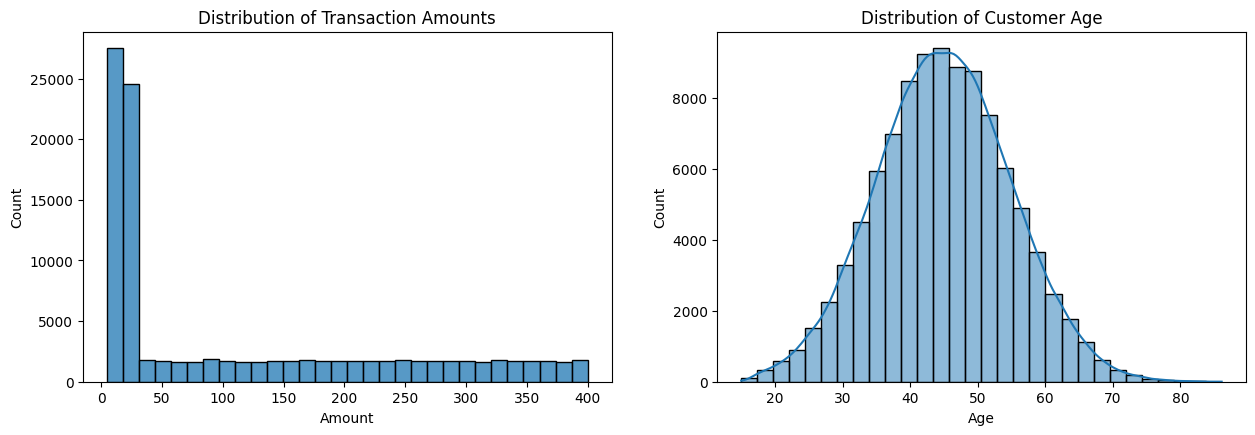

In [ ]:
plt.figure(figsize=(15, 10))

# Histogram for 'Amount'
plt.subplot(2, 2, 1)
sns.histplot(df['Amount'], bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')

# Histogram for 'Age'
plt.subplot(2, 2, 2)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')

plt.show()

<ipython-input-106-9696ca7f2f09>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Time', y='Amount', data=df, ci=None)


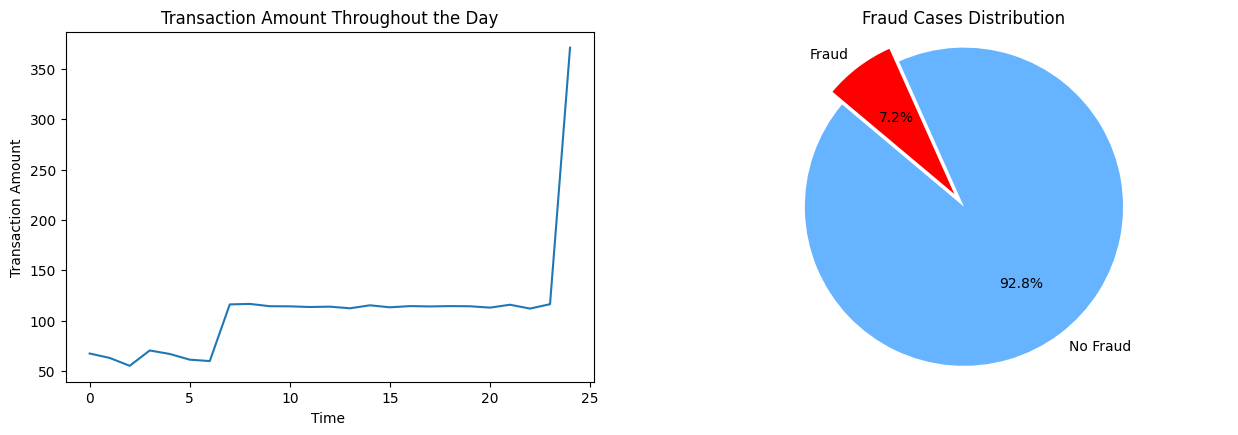

In [ ]:
# Plot Time vs. Amount
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.lineplot(x='Time', y='Amount', data=df, ci=None)
plt.title('Transaction Amount Throughout the Day')
plt.xlabel('Time ')
plt.ylabel('Transaction Amount')

plt.subplot(2, 2, 2)
#'Fraud' slice is pulled out
explode = (0, 0.1)
# Plot pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#FF0000'])
plt.title('Fraud Cases Distribution')
plt.axis('equal')

plt.show()


<ipython-input-107-884a81bdf566>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bank_distribution.index, y=bank_distribution.values, palette='viridis')


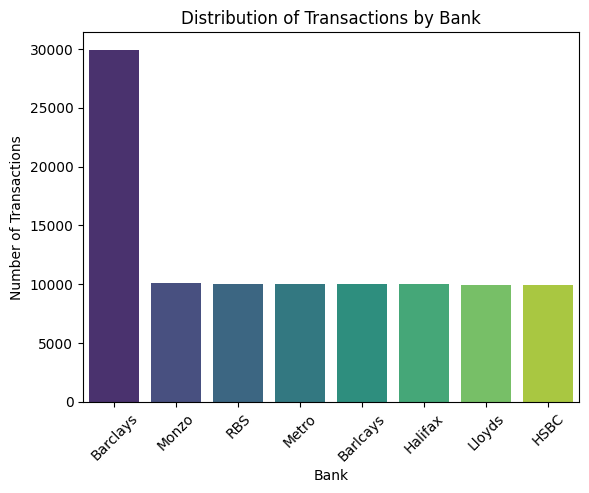

In [ ]:
bank_distribution = df['Bank'].value_counts()
sns.barplot(x=bank_distribution.index, y=bank_distribution.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Bank')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transactions by Bank')
plt.show()

<ipython-input-108-a545046f1453>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type of Card', data=df, palette='magma')


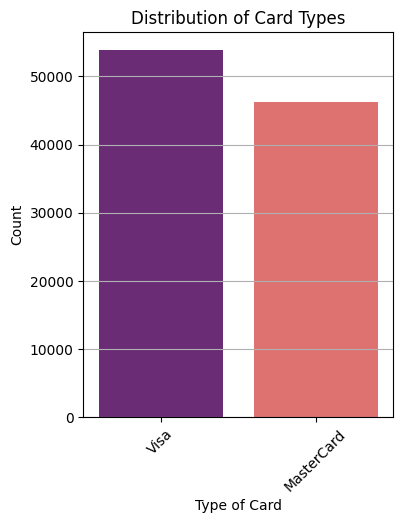

In [ ]:
plt.figure(figsize=(4, 5))
sns.countplot(x='Type of Card', data=df, palette='magma')

# Customizing the plot
plt.xticks(rotation=45)
plt.xlabel('Type of Card')
plt.ylabel('Count')
plt.title('Distribution of Card Types')
plt.grid(axis='y')
plt.show()

In [ ]:
fraud_counts = df['Fraud'].value_counts()
labels = ['No Fraud', 'Fraud']
sizes = fraud_counts.values
fraud_counts

,count
Fraud,
0,92805
1,7195


***Visual Reprentation of all Key Attributes with Fraud Rate***

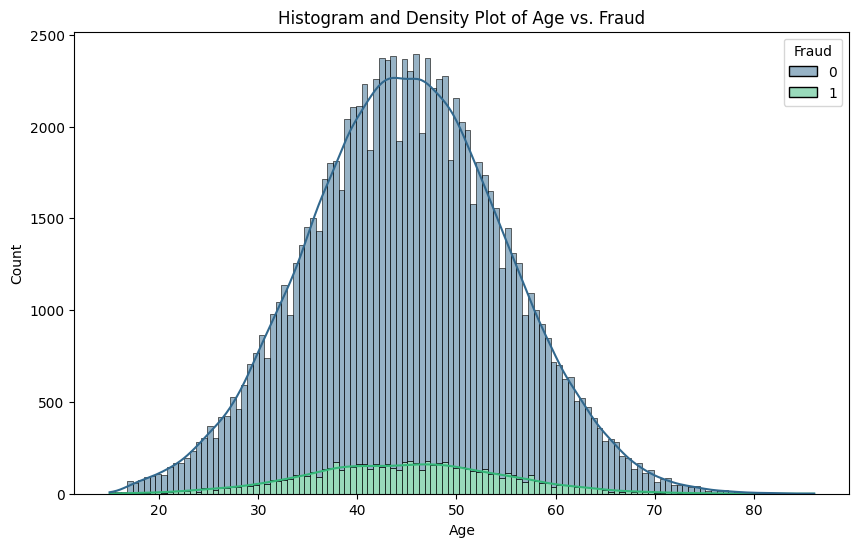

In [ ]:
#Plot Fraud Rate by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Fraud', multiple='stack', palette='viridis', kde=True)
plt.title('Histogram and Density Plot of Age vs. Fraud')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()


<ipython-input-110-b587155fa1b3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_bank.index, y=fraud_rate_by_bank.values, palette='magma')


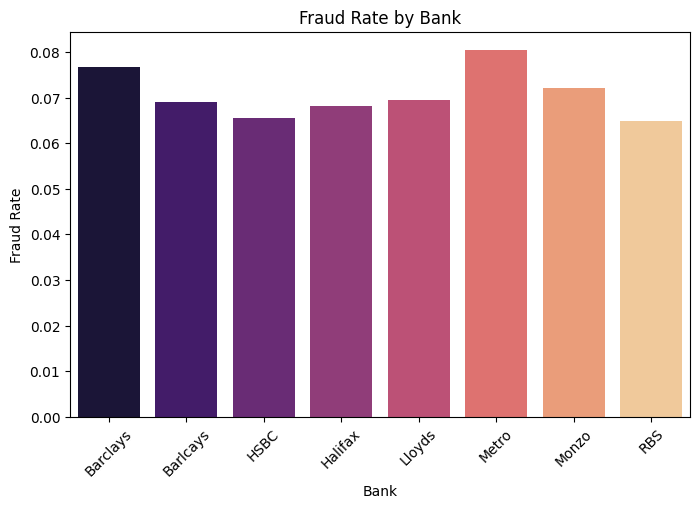

In [ ]:
fraud_by_bank = df.groupby('Bank')['Fraud'].sum()

# Total transactions by bank
total_by_bank = df['Bank'].value_counts()

# Fraud rate by bank
fraud_rate_by_bank = fraud_by_bank / total_by_bank

# Plot fraud rate by bank
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_rate_by_bank.index, y=fraud_rate_by_bank.values, palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Bank')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Bank')
plt.show()

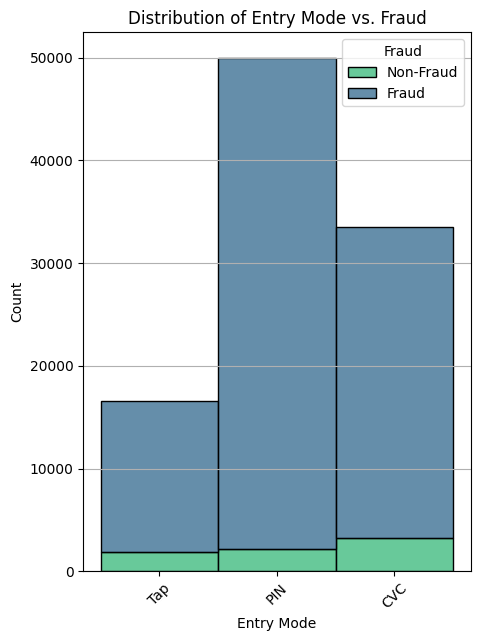

In [ ]:
plt.figure(figsize=(5, 7))
sns.histplot(data=df, x='Entry Mode', hue='Fraud', multiple='stack', palette='viridis', discrete=True)

# Customizing the plot
plt.xlabel('Entry Mode')
plt.ylabel('Count')
plt.title('Distribution of Entry Mode vs. Fraud')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

<ipython-input-112-709181035c6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_country, y=fraud_rate_by_country.index, palette='viridis')


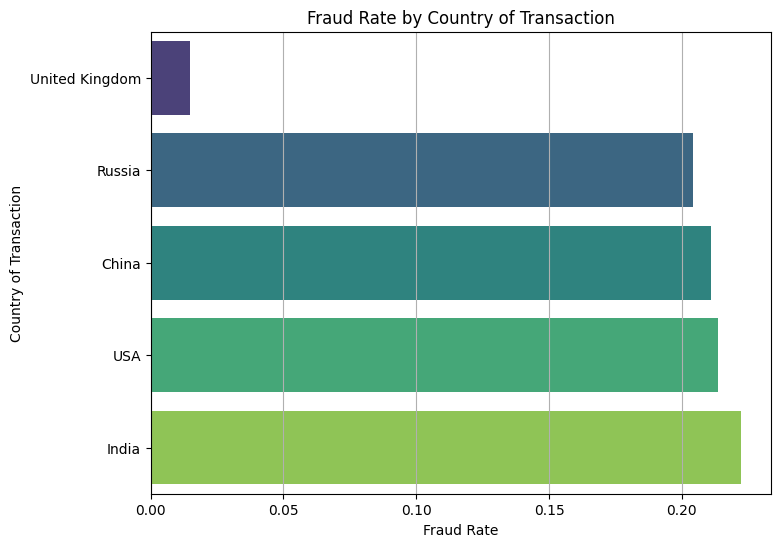

In [ ]:
fraud_rate_by_country = df.groupby('Country of Transaction')['Fraud'].mean().sort_values()

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_rate_by_country, y=fraud_rate_by_country.index, palette='viridis')

# Customizing the plot
plt.xlabel('Fraud Rate')
plt.ylabel('Country of Transaction')
plt.title('Fraud Rate by Country of Transaction')
plt.grid(axis='x')

# Show the plot
plt.show()

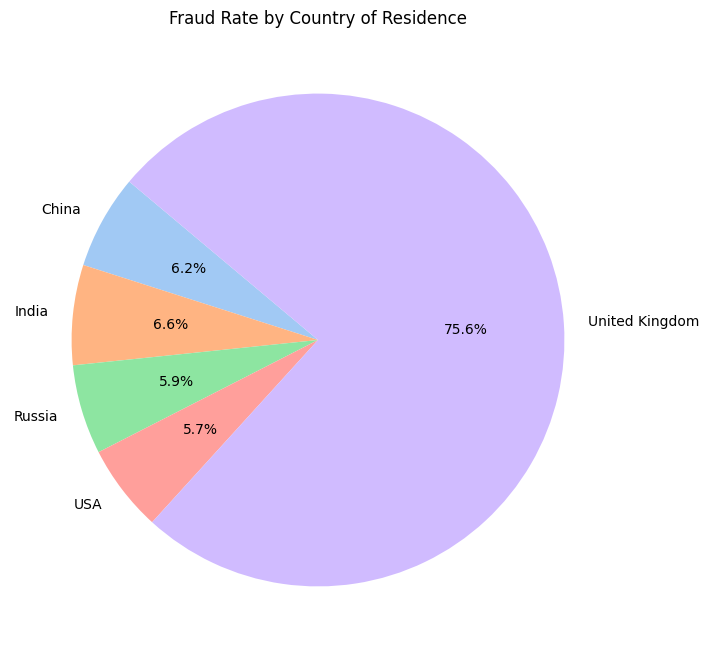

In [ ]:
fraud_rate_by_country_residence = df.groupby('Country of Residence')['Fraud'].mean()

num_colors = len(fraud_rate_by_country_residence)
colors = sns.color_palette("pastel", num_colors)  # Using 'pastel' palette for light colors

# Plotting the pie chart
plt.figure(figsize=(12, 8))
plt.pie( fraud_rate_by_country_residence,labels=fraud_rate_by_country_residence.index,autopct='%1.1f%%',startangle=140, colors=colors)
plt.title('Fraud Rate by Country of Residence')
plt.show()

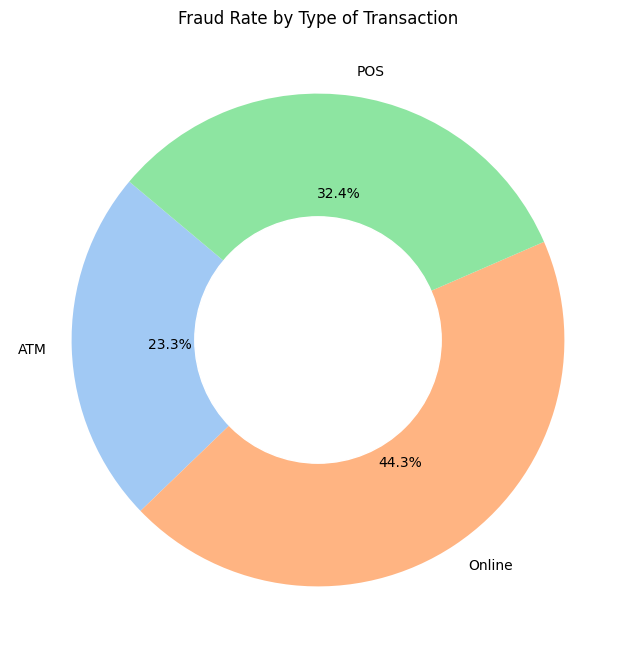

In [ ]:
fraud_rate_by_transaction_type = df.groupby('Type of Transaction')['Fraud'].mean()

# Create a donut chart
plt.figure(figsize=(10, 8))

# Plotting the pie chart
plt.pie(
    fraud_rate_by_transaction_type,
    labels=fraud_rate_by_transaction_type.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel", len(fraud_rate_by_transaction_type))
)

# Draw a circle in the center to turn the pie chart into a donut chart
centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Fraud Rate by Type of Transaction')
plt.show()

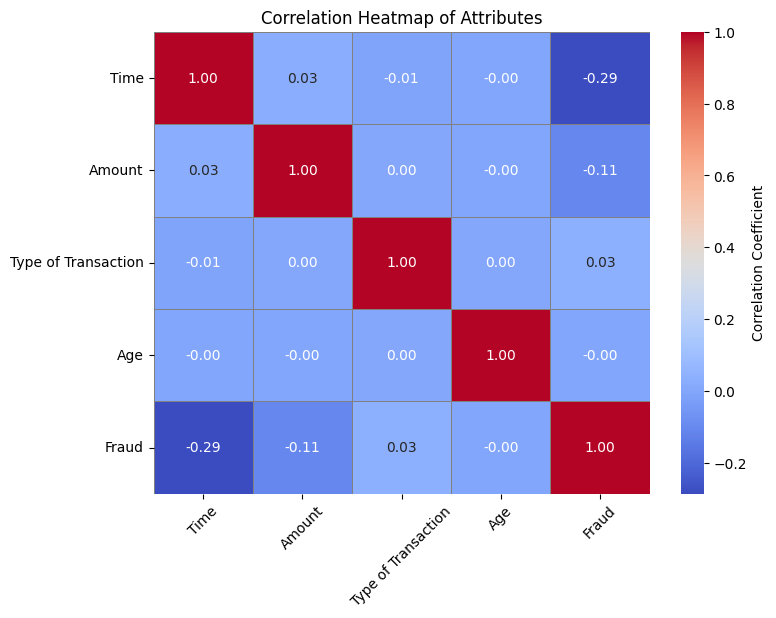

In [ ]:
!pip install matplotlib seaborn scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap( correlation_matrix, cmap='coolwarm',  annot=True,fmt='.2f',linewidths=.5,linecolor='gray',
            cbar_kws={'label': 'Correlation Coefficient'} # Color bar label
)

# Customizing the plot
plt.title('Correlation Heatmap of Attributes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Type of Transaction' column
df['Type of Transaction'] = label_encoder.fit_transform(df['Type of Transaction'])
print(df.head())

  Transaction ID       Date Day of Week  Time Type of Card Entry Mode  Amount  \
0      #3577 209  14-Oct-20   Wednesday    19         Visa        Tap     5.0   
1      #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   288.0   
2      #2694 780  14-Oct-20   Wednesday    14         Visa        Tap     5.0   
3      #2640 960  13-Oct-20     Tuesday    14         Visa        Tap    28.0   
4      #2771 031  13-Oct-20     Tuesday    23         Visa        CVC    91.0   

   Type of Transaction Merchant Group Country of Transaction Shipping Address  \
0                    2  Entertainment         United Kingdom   United Kingdom   
1                    2       Services                    USA              USA   
2                    2     Restaurant                  India            India   
3                    2  Entertainment         United Kingdom            India   
4                    1    Electronics                    USA              USA   

  Country of Residence Gen

In [ ]:
df['Type of Transaction'].head(10)

,Type of Transaction
0,2
1,2
2,2
3,2
4,1
5,2
6,1
7,1
8,0
9,2


In [ ]:
#Remove Misssing values
df = df.dropna()

***Lable Encosing and Train, Test Split***

In [ ]:
# Check and drop the column if it exists
if 'Transaction ID' in df.columns:
    df = df.drop(columns=['Transaction ID'])

# Separate numeric and categorical features
df_numeric = df.select_dtypes(include=['number'])
df_categorical = df.select_dtypes(exclude=['number'])

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df_categorical, drop_first=True)

# If there are any non-numeric columns that need label encoding, use LabelEncoder
label_encoder = LabelEncoder()
for col in df_categorical.columns:
    df_categorical[col] = label_encoder.fit_transform(df_categorical[col])

# Combine numeric and encoded categorical features
df_encoded = pd.concat([df_numeric, df_categorical], axis=1)

# Ensure 'Fraud' is the target variable and all other columns are features
X = df_encoded.drop(columns=['Fraud'])  # Features
y = df_encoded['Fraud']                 # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled.shape

(19996, 14)

**Logistic Regression**

In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report Logistic Regression')
print(report)


Accuracy: 0.96
Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18535
           1       0.78      0.55      0.65      1461

    accuracy                           0.96     19996
   macro avg       0.87      0.77      0.81     19996
weighted avg       0.95      0.96      0.95     19996



<Figure size 800x600 with 0 Axes>

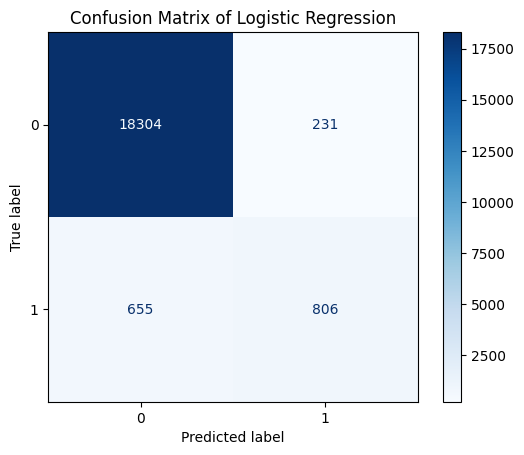

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')  # You can choose different color maps and formats
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report Decision Tree')
print(report)


Accuracy: 0.98
Classification Report Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18535
           1       0.81      0.86      0.83      1461

    accuracy                           0.98     19996
   macro avg       0.90      0.92      0.91     19996
weighted avg       0.98      0.98      0.98     19996



<Figure size 800x600 with 0 Axes>

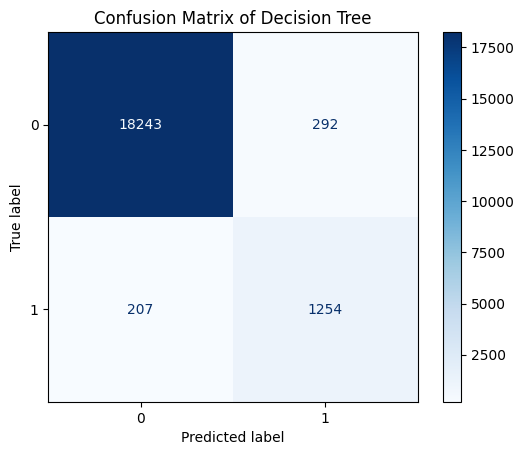

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')  # You can choose different color maps and formats
plt.title('Confusion Matrix of Decision Tree')
plt.show()

***Random Forest Model***

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report Random Forest')
print(report)

Accuracy: 0.99
Classification Report Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18535
           1       0.97      0.82      0.89      1461

    accuracy                           0.99     19996
   macro avg       0.98      0.91      0.94     19996
weighted avg       0.98      0.99      0.98     19996



<Figure size 800x600 with 0 Axes>

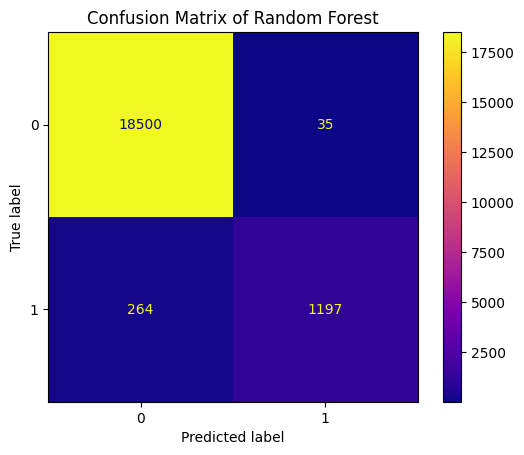

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object with a different color map
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix with a different color map
plt.figure(figsize=(8, 6))
disp.plot(cmap='plasma', values_format='d')  # Use 'plasma' color map here
plt.title('Confusion Matrix of Random Forest')
plt.show()

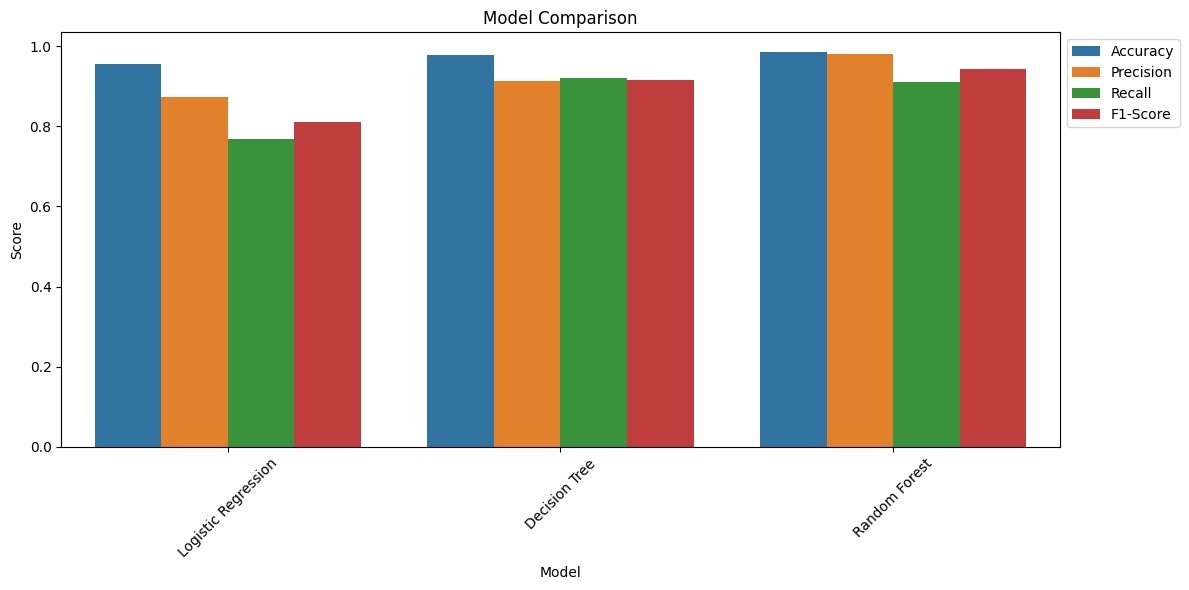

In [ ]:

# Example DataFrame creation
# df = pd.read_csv('path_to_your_dataset.csv')

# ... (Your data preprocessing code from previous response) ...

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append([name, accuracy, report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Melt the DataFrame to create a long-form dataset for plotting
results_df_melted = pd.melt(results_df, id_vars='Model', var_name='Metric', value_name='Score')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_df_melted)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()